<a href="https://colab.research.google.com/github/TysonC0ders/BigData_MDTS4213/blob/main/Quantium_Virtual_Internship_Retail_Strategy_and_Analytics_Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Loading required libraries and datasets :

In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

In [61]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [62]:
transactionData_org = pd.read_excel('/content/drive/MyDrive/Quantium/QVI_transaction_data.xlsx')
customerData_org = pd.read_csv('/content/drive/MyDrive/Quantium/QVI_purchase_behaviour.csv')

#Exploratory data analysis :
The first step in any analysis is to first understand the data. Let's take a look at each of the datasets provided.

In [63]:
# Making copies for avoiding permanent changes in imported data :
transactionData = transactionData_org.copy()
customerData = customerData_org.copy()

# Display the data for further observations :
print(" The transaction data : \n")
display(transactionData)
print("\n \n The customer data : \n")
display(customerData)

 The transaction data : 



,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,43325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8



 
 The customer data : 



,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
...,...,...,...
72632,2370651,MIDAGE SINGLES/COUPLES,Mainstream
72633,2370701,YOUNG FAMILIES,Mainstream
72634,2370751,YOUNG FAMILIES,Premium
72635,2370961,OLDER FAMILIES,Budget


##Examining transaction data :

We can use `info()` to look at the format of each column and see a sample of the data. As we have read in the dataset as a `pd` object, we can also run `transactionData` in the console to see a sample of the data or use `transactionData.head()` to look at the first 5 rows.

In [64]:
transactionData.info()
transactionData.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


We can observe that the `DATE` is in intiger format, let us covert it into date format.

**Converting DATE column to a date format. A quick search online tells us that CSV and Excel integer dates begin on 30 Dec 1899.**

In [65]:
transactionData['DATE'] = pd.to_datetime(transactionData['DATE'], unit='D', origin= '1899-12-30')
display(transactionData)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


We should check that we are looking at the right products by examining `PROD_NAME`.

In [66]:
display(transactionData['PROD_NAME'].describe())    # Generate a summary of the PROD_NAME column.
unique_items = transactionData['PROD_NAME'].unique()   # Extract the unique items of the transactionData.
print(f"\nThe unique items of the transactionData : \n \n {unique_items}")

,PROD_NAME
count,264836
unique,114
top,Kettle Mozzarella Basil & Pesto 175g
freq,3304



The unique items of the transactionData : 
 
 ['Natural Chip        Compny SeaSalt175g' 'CCs Nacho Cheese    175g'
 'Smiths Crinkle Cut  Chips Chicken 170g'
 'Smiths Chip Thinly  S/Cream&Onion 175g'
 'Kettle Tortilla ChpsHny&Jlpno Chili 150g'
 'Old El Paso Salsa   Dip Tomato Mild 300g'
 'Smiths Crinkle Chips Salt & Vinegar 330g'
 'Grain Waves         Sweet Chilli 210g'
 'Doritos Corn Chip Mexican Jalapeno 150g'
 'Grain Waves Sour    Cream&Chives 210G'
 'Kettle Sensations   Siracha Lime 150g' 'Twisties Cheese     270g'
 'WW Crinkle Cut      Chicken 175g' 'Thins Chips Light&  Tangy 175g'
 'CCs Original 175g' 'Burger Rings 220g'
 'NCC Sour Cream &    Garden Chives 175g'
 'Doritos Corn Chip Southern Chicken 150g' 'Cheezels Cheese Box 125g'
 'Smiths Crinkle      Original 330g'
 'Infzns Crn Crnchers Tangy Gcamole 110g'
 'Kettle Sea Salt     And Vinegar 175g'
 'Smiths Chip Thinly  Cut Original 175g' 'Kettle Original 175g'
 'Red Rock Deli Thai  Chilli&Lime 150g' 'Pringles Sthrn FriedChicken 1

Looks like we are definitely looking at potato chips but how can we check that these are all chips?

We can do some basic text analysis by summarising the individual words in the product name.

In [67]:
import re
from collections import Counter

all_products = " ".join(unique_items)    # It takes the unique_item list (which contains unique product names) and joins all the elements into a single string. It places a space between each product name.
clean_text = re.sub(r'[^A-Za-z]', ' ', all_products)    # Replace digits and special characters with space and Keep only letters
words = clean_text.lower().split()  # Split into individual words and lowercase for uniformity
word_counts = Counter(words)    # Count word frequencies

# Let's look at the most common words by counting the number of times a word appears
# Sorting them by this frequency in order of highest to lowest frequency
word_freq_df = pd.DataFrame(word_counts.items(), columns=['word', 'frequency'])   # Convert to DataFrame
word_freq_df = word_freq_df.sort_values(by='frequency', ascending=False).reset_index(drop=True)   # Sorting them

print("\nDistinct words sorted by frequency (after cleaning) : \n")
display(word_freq_df)


Distinct words sorted by frequency (after cleaning) : 



,word,frequency
0,g,114
1,chips,21
2,smiths,16
3,cut,14
4,crinkle,14
...,...,...
193,rst,1
194,pork,1
195,belly,1
196,pc,1


There are salsa and dip products in the dataset but we are only interested in the chips category, so let's remove these.

In [68]:
non_chips = transactionData["PROD_NAME"].str.contains('salsa | dip',case = False)   # Name of the products that contains salsa or dip.

transactionData_non_chips = transactionData[non_chips]    # The transactions that contain salsa and dip products.
print(f"\nThe products that does not contain any chips item : \n")
display(transactionData_non_chips)

transactionData_chips = transactionData[~non_chips]   # The transactions that contain chips products.
print(f"\n\nThe products that contain chips item : \n")
display(transactionData_chips)

print(f"\n\nThe numer of times each product have bought : \n")
transactionData_chips.groupby('PROD_NAME').size().reset_index(name='Transaction_count')   # Number of trensactions for each product


The products that does not contain any chips item : 



,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
5,2019-05-19,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5.1
25,2019-05-15,39,39144,35506,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5.1
32,2019-05-20,45,45127,41122,64,Red Rock Deli SR Salsa & Mzzrlla 150g,2,5.4
44,2018-08-18,56,56013,50090,39,Smiths Crinkle Cut Tomato Salsa 150g,1,2.6
63,2019-05-15,82,82480,82047,101,Doritos Salsa Medium 300g,1,2.6
...,...,...,...,...,...,...,...,...
264675,2019-04-20,265,265103,263419,59,Old El Paso Salsa Dip Tomato Med 300g,1,5.1
264678,2019-03-30,265,265111,263428,35,Woolworths Mild Salsa 300g,1,1.5
264719,2018-10-28,266,266278,264104,39,Smiths Crinkle Cut Tomato Salsa 150g,1,2.6
264734,2019-01-11,267,267324,264374,41,Doritos Salsa Mild 300g,1,2.6




The products that contain chips item : 



,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8




The numer of times each product have bought : 



,PROD_NAME,Transaction_count
0,Burger Rings 220g,1564
1,CCs Nacho Cheese 175g,1498
2,CCs Original 175g,1514
3,CCs Tasty Cheese 175g,1539
4,Cheetos Chs & Bacon Balls 190g,1479
...,...,...
100,WW Original Corn Chips 200g,1495
101,WW Original Stacked Chips 160g,1487
102,WW Sour Cream &OnionStacked Chips 160g,1483
103,WW Supreme Cheese Corn Chips 200g,1509


Next, we can use `describe()` to check summary statistics such as mean, min and max values for each feature to see if there are any obvious outliers in the data and if there are any nulls in any of the columns (`NaN : number of nulls` will appear in the output if there are any nulls).

In [69]:
transactionData_chips.describe()    # Summarise the data to check for nulls and possible outliers

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,246742,246742.000000,2.467420e+05,2.467420e+05,246742.000000,246742.000000,246742.000000
mean,2018-12-30 01:19:01.211467520,135.051098,1.355310e+05,1.351311e+05,56.351789,1.908062,7.321322
min,2018-07-01 00:00:00,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000
25%,2018-09-30 00:00:00,70.000000,7.001500e+04,6.756925e+04,26.000000,2.000000,5.800000
50%,2018-12-30 00:00:00,130.000000,1.303670e+05,1.351830e+05,53.000000,2.000000,7.400000
75%,2019-03-31 00:00:00,203.000000,2.030840e+05,2.026538e+05,87.000000,2.000000,8.800000
max,2019-06-30 00:00:00,272.000000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000
std,NaN,76.787096,8.071528e+04,7.814772e+04,33.695428,0.659831,3.077828


There are no nulls in the columns but product quantity appears to have an outlier which we should investigate further. Let's investigate the case where 200 packets of chips are bought in one transaction.

In [70]:
max_product_quantity = transactionData_chips[transactionData_chips['PROD_QTY'] == 200]    # The transactions that contains 200(maximum) product quantity
print(f"\nThe transactions that have max quantity : \n")
display(max_product_quantity)


The transactions that have max quantity : 



,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


There are two transactions where 200 packets of chips are bought in one transaction and both of these transactions were by the same customer.

In [71]:
max_product_quantity_customer = transactionData_chips[transactionData_chips['LYLTY_CARD_NBR'] == 226000]    # The other transactions that customer made.
print(f"\nThe customers who have max quantity transaction : \n")
display(max_product_quantity_customer)


The customers who have max quantity transaction : 



,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


It looks like this customer has only had the two transactions over the year and is not an ordinary retail customer. The customer might be buying chips for commercial purposes instead. We'll remove this loyalty card number from further analysis.

In [72]:
transactionData_chips_cleaned = transactionData_chips.drop(max_product_quantity_customer.index)   # Filter out the customer based on the loyalty card number.
print(f"\nThe cleaned data : \n")
display(transactionData_chips_cleaned)

print(f"\nObservations from the cleaned data : \n")
transactionData_chips_cleaned.describe()    # Re-examine transaction data


The cleaned data : 



,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8



Observations from the cleaned data : 



,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,246740,246740.000000,2.467400e+05,2.467400e+05,246740.000000,246740.000000,246740.000000
mean,2018-12-30 01:18:58.448569344,135.050361,1.355303e+05,1.351304e+05,56.352213,1.906456,7.316113
min,2018-07-01 00:00:00,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000
25%,2018-09-30 00:00:00,70.000000,7.001500e+04,6.756875e+04,26.000000,2.000000,5.800000
50%,2018-12-30 00:00:00,130.000000,1.303670e+05,1.351815e+05,53.000000,2.000000,7.400000
75%,2019-03-31 00:00:00,203.000000,2.030832e+05,2.026522e+05,87.000000,2.000000,8.800000
max,2019-06-30 00:00:00,272.000000,2.373711e+06,2.415841e+06,114.000000,5.000000,29.500000
std,NaN,76.786971,8.071520e+04,7.814760e+04,33.695235,0.342499,2.474897


 Now, let's look at the number of transaction lines over time to see if there are any obvious data issues such as missing data.

In [73]:
# Grouping transactions by date, counts how many occurred each day, resets the result into a DataFrame, and sorts it by date in ascending order.
transactionData_by_date = transactionData_chips_cleaned.groupby('DATE').size().reset_index(name='transaction_count').sort_values(by='DATE',ascending=True)
print(f"\nThe transactions by date : \n")
display(transactionData_by_date)


The transactions by date : 



,DATE,transaction_count
0,2018-07-01,663
1,2018-07-02,650
2,2018-07-03,674
3,2018-07-04,669
4,2018-07-05,660
...,...,...
359,2019-06-26,657
360,2019-06-27,669
361,2019-06-28,673
362,2019-06-29,703


There's only 364 rows, meaning only 364 dates which indicates a missing date. Let's create a sequence of dates from 1 Jul 2018 to 30 Jun 2019 and use this to create a chart of number of transactions over time to find the missing date.

In [74]:
daily_counts = pd.date_range(start = '2018-7-1', end = '30/6/2019', freq = 'D')
daily_counts_df = pd.DataFrame(daily_counts, columns=['DATE'])     # Create a column of dates that includes every day from 1 Jul 2018 to 30 Jun 2019

transactionData_chips_cleaned_by_day = daily_counts_df.merge(transactionData_chips_cleaned.sort_values(by = 'DATE'), on='DATE', how='left')    # Join that column of dates onto the transactionData.
transactionData_chips_cleaned_by_day = transactionData_chips_cleaned_by_day.fillna(0)   # Fill the missng value by 0
transactionData_chips_cleaned_by_day[['STORE_NBR', 'LYLTY_CARD_NBR', 'TXN_ID', 'PROD_NBR','PROD_QTY']] = transactionData_chips_cleaned_by_day[['STORE_NBR', 'LYLTY_CARD_NBR', 'TXN_ID', 'PROD_NBR','PROD_QTY']].astype(int)

print(f"\nThe transaction count with all : \n")
display(transactionData_chips_cleaned_by_day)

missing_dates = transactionData_chips_cleaned_by_day[transactionData_chips_cleaned_by_day['TOT_SALES'] == 0]['DATE']    # Extracting the date containing 0 as total sales
print("\nMissing date(s) with no transactions: \n", missing_dates)


The transaction count with all : 



,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-07-01,88,88140,86914,25,Pringles SourCream Onion 134g,2,7.4
1,2018-07-01,60,60276,57330,3,Kettle Sensations Camembert & Fig 150g,2,9.2
2,2018-07-01,199,199014,197623,104,Infuzions Thai SweetChili PotatoMix 110g,2,7.6
3,2018-07-01,35,35052,31630,11,RRD Pc Sea Salt 165g,1,3.0
4,2018-07-01,72,72104,71038,20,Doritos Cheese Supreme 330g,2,11.4
...,...,...,...,...,...,...,...,...
246736,2019-06-30,112,112141,114611,98,NCC Sour Cream & Garden Chives 175g,2,6.0
246737,2019-06-30,207,207155,205513,99,Pringles Sthrn FriedChicken 134g,2,7.4
246738,2019-06-30,10,10140,9882,12,Natural Chip Co Tmato Hrb&Spce 175g,2,6.0
246739,2019-06-30,6,6258,6047,29,French Fries Potato Chips 175g,1,3.0



Missing date(s) with no transactions: 
 120465   2018-12-25
Name: DATE, dtype: datetime64[ns]


Now let's plot the transactionData by date, for further observation


The amount of daily transactions : 



,DATE,transaction_count
0,2018-07-01,663
1,2018-07-02,650
2,2018-07-03,674
3,2018-07-04,669
4,2018-07-05,660
...,...,...
360,2019-06-26,657
361,2019-06-27,669
362,2019-06-28,673
363,2019-06-29,703



 
The Plot of daily transactions over the whole time : 



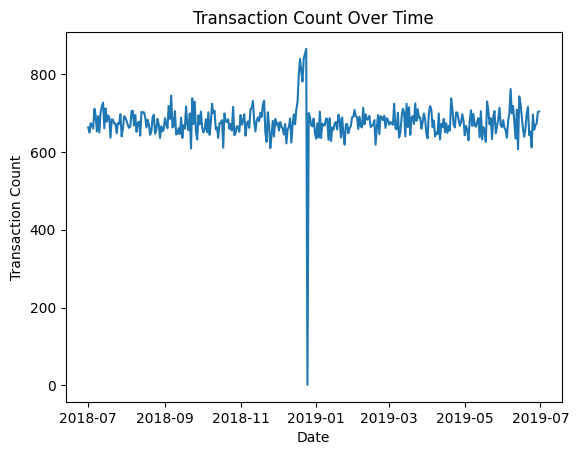

In [75]:
transactionData_by_day_table = transactionData_chips_cleaned_by_day.groupby('DATE').size().reset_index(name='transaction_count').sort_values(by='DATE',ascending=True)
print("\nThe amount of daily transactions : \n")
display(transactionData_by_day_table)

print("\n \nThe Plot of daily transactions over the whole time : \n")
plt.plot(transactionData_by_day_table['DATE'], transactionData_by_day_table['transaction_count'])
plt.xlabel('Date')
plt.ylabel('Transaction Count')
plt.title('Transaction Count Over Time')
plt.show()

We can see that there is an increase in purchases in December and a break in late December. Let's zoom in on this.

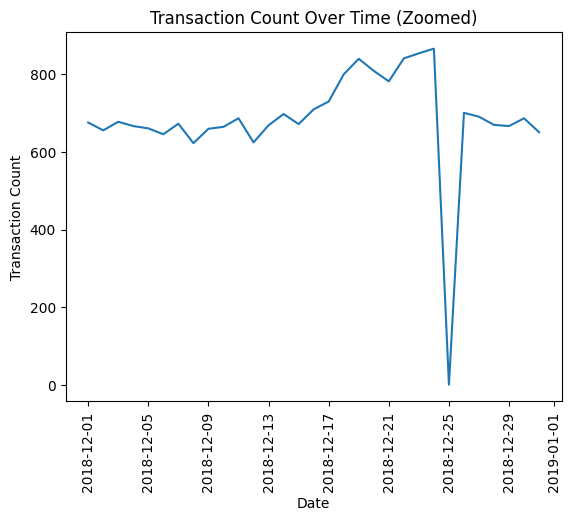

In [76]:
transactions_by_day_zoomed = transactionData_by_day_table[(transactionData_by_day_table['DATE'] >= '2018-12-01') & (transactionData_by_day_table['DATE'] <= '2018-12-31')]    # Filter to December
plt.plot(transactions_by_day_zoomed['DATE'], transactions_by_day_zoomed['transaction_count'])
plt.xticks(rotation=90)   # display the x_axis labels at an angel of 90 degrees
plt.xlabel('Date')
plt.ylabel('Transaction Count')
plt.title('Transaction Count Over Time (Zoomed)')
plt.show()

We can see that the increase in sales occurs in the lead-up to Christmas and that there are zero sales on Christmas day itself. This is due to shops being closed on Christmas day.

Now that we are satisfied that the data no longer has outliers, we can move on to creating other features such as brand of chips or pack size from `PROD_NAME`. We will start with pack size.

###Checking pack size :

In [77]:
transactionData_chips_cleaned_by_day.loc[transactionData_chips_cleaned_by_day['PROD_NAME'] == 0, 'PROD_NAME'] = 'NaN 0g'    # This code will be meaningful if we carry on the process with this dataset

item_names = transactionData_chips_cleaned['PROD_NAME']   # Extract the unique items of PROD_NAME from the transactionData.

all_products = "  ".join(item_names )   # It takes the unique_item list (which contains unique product names) and joins all the elements into a single string. It places a space between each product name.

PACK_SIZE = re.findall(r'\d+', all_products)   # It extracts all substrings from all_products that consist of one or more digits immediately followed by the letter 'g' (e.g., '175g').

PACK_SIZE_count = Counter(PACK_SIZE)
PACK_SIZE_count_table = pd.DataFrame(PACK_SIZE_count.items(),columns=['PACK_SIZE','frequency'])
PACK_SIZE_count_table['PACK_SIZE_num'] = PACK_SIZE_count_table['PACK_SIZE'].str.extract(r'(\d+)').astype(int)    # Adds a new column 'PACK_SIZE_num' containing just the numeric part of the 'PACK_SIZE' column (like 175 from '175g').
PACK_SIZE_count_table = PACK_SIZE_count_table.sort_values(by='PACK_SIZE_num', ascending=False).drop(columns='PACK_SIZE_num')   # Sorts the table based on numeric weight (e.g., 70g < 90g < 100g...) and then removes the helper column 'PACK_SIZE_num'.

print("\nDistinct weights sorted by Pack size : \n")
display(PACK_SIZE_count_table)


Distinct weights sorted by Pack size : 



,PACK_SIZE,frequency
10,380,6416
3,330,12540
5,270,6285
14,250,3169
6,220,1564
4,210,6272
15,200,4473
17,190,2995
11,180,1468
0,175,66390


The largest size is 380g and the smallest size is 70g - seems sensible!

Let's plot a histogram of PACK_SIZE since we know that it is a categorical variable and not a continuous variable even though it is numeric.

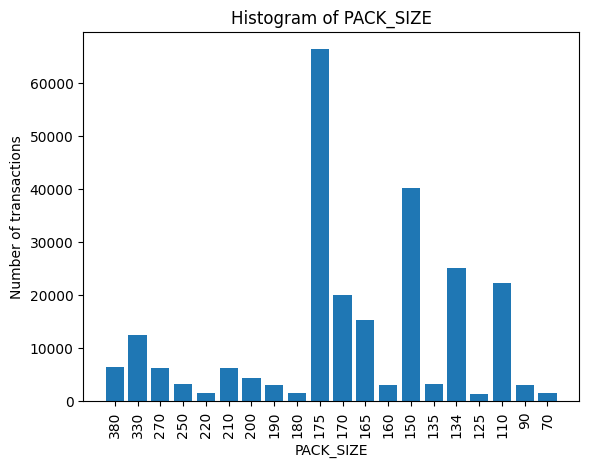

In [78]:
plt.bar(PACK_SIZE_count_table['PACK_SIZE'], PACK_SIZE_count_table['frequency'])   # Plotting a histogram showing the number of transactions by pack size.
plt.xticks(rotation=90)   # display the PACK_SIZEs at an angel of 90 degrees
plt.xlabel('PACK_SIZE')
plt.ylabel('Number of transactions')
plt.title('Histogram of PACK_SIZE')
plt.show()

Pack sizes created look reasonable.

Now to create brands, we can use the first word in PROD_NAME to work out the brand name.

In [79]:
unique_items = transactionData_chips_cleaned['PROD_NAME']  # Extract the items of PROD_NAME from the transactionData.

BRANDS = [''.join(item.strip().split()[0]) for item in unique_items]    # Extracts the first three words (usually brand name) from each product name in unique_item by cleaning spaces and splitting the text.

BRANDS_count_table = pd.DataFrame(Counter(BRANDS).items(),columns=['BRAND_NAME','frequency']).sort_values(by='frequency', ascending=False)
print("\nDistinct brands sorted by frequency : \n")
display(BRANDS_count_table)


Distinct brands sorted by frequency : 



,BRAND_NAME,frequency
3,Kettle,41288
2,Smiths,27390
14,Pringles,25102
5,Doritos,22041
8,Thins,14075
22,RRD,11894
16,Infuzions,11057
7,WW,10320
20,Cobs,9693
23,Tostitos,9471


###Checking brands :

Some of the brand names look like they are of the same brands - such as RED and RRD, which are both Red Rock Deli chips and WW is Woolworths. Let's replace these.

In [80]:
replacements = {
    'Red': 'Red Rock Deli',
    'RRD': 'Red Rock Deli',
    'WW': 'Woolworths'
}

BRANDS = [replacements.get(brand, brand) for brand in BRANDS]

BRANDS_count_table = pd.DataFrame(Counter(BRANDS).items(),columns=['BRAND_NAME','frequency']).sort_values(by='frequency', ascending=False)

print("\nDistinct brands sorted by frequency after combining similar brands : \n")
display(BRANDS_count_table)


Distinct brands sorted by frequency after combining similar brands : 



,BRAND_NAME,frequency
3,Kettle,41288
2,Smiths,27390
14,Pringles,25102
5,Doritos,22041
13,Red Rock Deli,16321
8,Thins,14075
7,Woolworths,11836
16,Infuzions,11057
20,Cobs,9693
22,Tostitos,9471


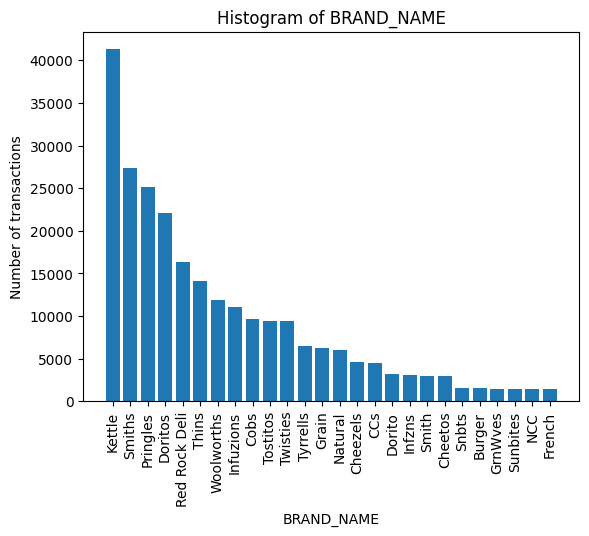

In [81]:
plt.bar(BRANDS_count_table['BRAND_NAME'],BRANDS_count_table['frequency'])
plt.xticks(rotation=90)
plt.xlabel('BRAND_NAME')
plt.ylabel('Number of transactions')
plt.title('Histogram of BRAND_NAME')
plt.show()

###Getting cleaned data

In [82]:
transactionData_chips_cleaned['BRANDS'] = BRANDS
transactionData_chips_cleaned['PACK_SIZE'] = PACK_SIZE

transactionData_cleaned = transactionData_chips_cleaned[['DATE', 'STORE_NBR', 'LYLTY_CARD_NBR', 'TXN_ID', 'PROD_NBR', 'BRANDS', 'PROD_NAME', 'PACK_SIZE', 'PROD_QTY', 'TOT_SALES']]
print(f"\nThe cleaned data : \n")
display(transactionData_cleaned)


The cleaned data : 



,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,BRANDS,PROD_NAME,PACK_SIZE,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural,Natural Chip Compny SeaSalt175g,175,2,6.0
1,2019-05-14,1,1307,348,66,CCs,CCs Nacho Cheese 175g,175,3,6.3
2,2019-05-20,1,1343,383,61,Smiths,Smiths Crinkle Cut Chips Chicken 170g,170,2,2.9
3,2018-08-17,2,2373,974,69,Smiths,Smiths Chip Thinly S/Cream&Onion 175g,175,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle,Kettle Tortilla ChpsHny&Jlpno Chili 150g,150,3,13.8
...,...,...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle,Kettle Sweet Chilli And Sour Cream 175g,175,2,10.8
264832,2018-08-13,272,272358,270154,74,Tostitos,Tostitos Splash Of Lime 175g,175,1,4.4
264833,2018-11-06,272,272379,270187,51,Doritos,Doritos Mexicana 170g,170,2,8.8
264834,2018-12-27,272,272379,270188,42,Doritos,Doritos Corn Chip Mexican Jalapeno 150g,150,2,7.8


Now that we are happy with the transaction dataset, let's have a look at the customer dataset.

In [83]:
print(f"\nThe customer data : \n")
display(customerData)


The customer data : 



,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
...,...,...,...
72632,2370651,MIDAGE SINGLES/COUPLES,Mainstream
72633,2370701,YOUNG FAMILIES,Mainstream
72634,2370751,YOUNG FAMILIES,Premium
72635,2370961,OLDER FAMILIES,Budget


In [84]:
print(f"\nThe structure of customer data : \n")
customerData.info()

print(f"\n \nThe summary of customer data : \n")
display(customerData.describe())

print(f"\n \nCount of premium-customer data over the lifestage : \n")
pd.crosstab(customerData['LIFESTAGE'], customerData['PREMIUM_CUSTOMER'])


The structure of customer data : 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB

 
The summary of customer data : 



,LYLTY_CARD_NBR
count,7.263700e+04
mean,1.361859e+05
std,8.989293e+04
min,1.000000e+03
25%,6.620200e+04
50%,1.340400e+05
75%,2.033750e+05
max,2.373711e+06



 
Count of premium-customer data over the lifestage : 



PREMIUM_CUSTOMER,Budget,Mainstream,Premium
LIFESTAGE,,,
MIDAGE SINGLES/COUPLES,1504,3340,2431
NEW FAMILIES,1112,849,588
OLDER FAMILIES,4675,2831,2274
OLDER SINGLES/COUPLES,4929,4930,4750
RETIREES,4454,6479,3872
YOUNG FAMILIES,4017,2728,2433
YOUNG SINGLES/COUPLES,3779,8088,2574


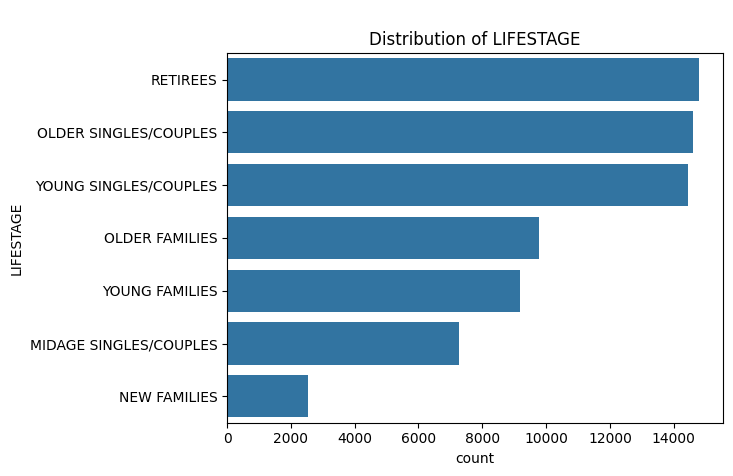

In [85]:
sns.countplot(y='LIFESTAGE', data=customerData, order=customerData['LIFESTAGE'].value_counts().index)   # Count plot for LIFESTAGE
plt.title('\nDistribution of LIFESTAGE')
plt.show()

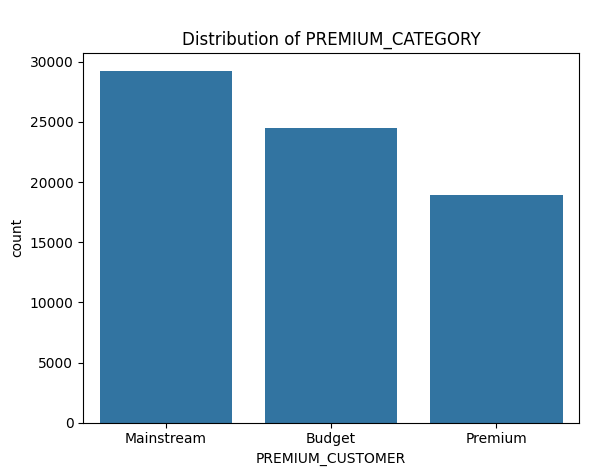

In [86]:
sns.countplot(x='PREMIUM_CUSTOMER', data=customerData, order=customerData['PREMIUM_CUSTOMER'].value_counts().index)   # Count plot for PREMIUM_CATEGORY
plt.title('\nDistribution of PREMIUM_CATEGORY')
plt.show()

###Obtaining the whole data :
Merge transaction data to customer data

In [87]:
data = transactionData_cleaned.merge(customerData, on = 'LYLTY_CARD_NBR', how = 'left')
print(f"\nThe merged data : \n")
display(data)


The merged data : 



,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,BRANDS,PROD_NAME,PACK_SIZE,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural,Natural Chip Compny SeaSalt175g,175,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs,CCs Nacho Cheese 175g,175,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343,383,61,Smiths,Smiths Crinkle Cut Chips Chicken 170g,170,2,2.9,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-17,2,2373,974,69,Smiths,Smiths Chip Thinly S/Cream&Onion 175g,175,5,15.0,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-18,2,2426,1038,108,Kettle,Kettle Tortilla ChpsHny&Jlpno Chili 150g,150,3,13.8,MIDAGE SINGLES/COUPLES,Budget
...,...,...,...,...,...,...,...,...,...,...,...,...
246735,2019-03-09,272,272319,270088,89,Kettle,Kettle Sweet Chilli And Sour Cream 175g,175,2,10.8,YOUNG SINGLES/COUPLES,Premium
246736,2018-08-13,272,272358,270154,74,Tostitos,Tostitos Splash Of Lime 175g,175,1,4.4,YOUNG SINGLES/COUPLES,Premium
246737,2018-11-06,272,272379,270187,51,Doritos,Doritos Mexicana 170g,170,2,8.8,YOUNG SINGLES/COUPLES,Premium
246738,2018-12-27,272,272379,270188,42,Doritos,Doritos Corn Chip Mexican Jalapeno 150g,150,2,7.8,YOUNG SINGLES/COUPLES,Premium


As the number of rows in `data` is the same as that of `transactionData`, we can be sure that no duplicates were created. This is because we created `data` by setting `how = 'left'` (in other words, a left join) which means take all the rows in `transactionData` and find rows with matching values in shared columns and then joining the details in these rows to the `LYLTY_CARD_NBR` or the first mentioned table.



Let's also check if some customers were not matched on by checking for nulls.

In [88]:
missing_customer = data[data['LIFESTAGE'].isna()]   # we ca also use isnull() instead of isna() .
print("\nThe missing customer data:\n")
display(missing_customer)


The missing customer data:



,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,BRANDS,PROD_NAME,PACK_SIZE,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER


Great, there are no nulls! So all our customers in the transaction data has been accounted for in the customer dataset.

For further experiments and tasks I want to retain this dataset. To do so I will write it out as a csv.

In [89]:
file_path = '/content/drive/MyDrive/Quantium/transactionData_cleaned.csv'
data.to_csv(file_path, index=False)

 Data exploration is now complete!


---



#Data analysis on customer segments :
####Now that the data is ready for analysis, we can define some metrics of interest to the client :
- Who spends the most on chips (total sales), describing customers by lifestage and how premium their general purchasing behaviour is
- How many customers are in each segment
- How many chips are bought per customer by segment- What's the average chip price by customer segment

####We could also ask our data team for more information :
- The customer's total spend over the period and total spend for each transaction
to understand what proportion of their grocery spend is on chips
- Proportion of customers in each customer segment overall to compare against the
mix of customers who purchase chips

Let's start with calculating total sales by LIFESTAGE and PREMIUM_CUSTOMER and
plotting the split by these segments to describe which customer segment contribute most to chip sales.

In [90]:
print(f"\nThe total sales by LIFESTAGE and PREMIUM_CUSTOMER : \n")
total_sales = data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum().reset_index().sort_values(by='TOT_SALES', ascending=False)
display(total_sales)

print(f"\n \n \nThe total sales by each category of LIFESTAGE and PREMIUM_CUSTOMER : ")
total_sales.value_counts()


The total sales by LIFESTAGE and PREMIUM_CUSTOMER : 



,LIFESTAGE,PREMIUM_CUSTOMER,TOT_SALES
6,OLDER FAMILIES,Budget,156863.75
19,YOUNG SINGLES/COUPLES,Mainstream,147582.20
13,RETIREES,Mainstream,145168.95
15,YOUNG FAMILIES,Budget,129717.95
9,OLDER SINGLES/COUPLES,Budget,127833.60
10,OLDER SINGLES/COUPLES,Mainstream,124648.50
11,OLDER SINGLES/COUPLES,Premium,123537.55
12,RETIREES,Budget,105916.30
7,OLDER FAMILIES,Mainstream,96413.55
14,RETIREES,Premium,91296.65



 
 
The total sales by each category of LIFESTAGE and PREMIUM_CUSTOMER : 


LIFESTAGE               PREMIUM_CUSTOMER  TOT_SALES
MIDAGE SINGLES/COUPLES  Budget            33345.70     1
                        Mainstream        84734.25     1
                        Premium           54443.85     1
NEW FAMILIES            Budget            20607.45     1
                        Mainstream        15979.70     1
                        Premium           10760.80     1
OLDER FAMILIES          Budget            156863.75    1
                        Mainstream        96413.55     1
                        Premium           75242.60     1
OLDER SINGLES/COUPLES   Budget            127833.60    1
                        Mainstream        124648.50    1
                        Premium           123537.55    1
RETIREES                Budget            105916.30    1
                        Mainstream        145168.95    1
                        Premium           91296.65     1
YOUNG FAMILIES          Budget            129717.95    1
                        Mainstream        86338.25     1
                        Premium           78571.70     1
YOUNG SINGLES/COUPLES   Budget            57122.10     1
                        Mainstream        147582.20    1
                        Premium           39052.30     1
Name: count, dtype: int64

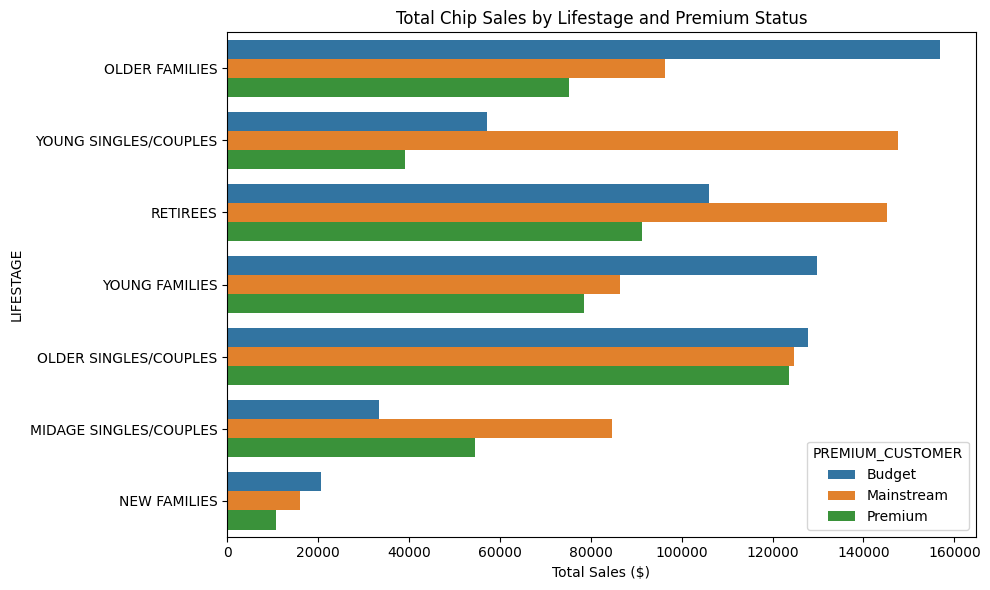

In [91]:
plt.figure(figsize=(10, 6))
sns.barplot(y='LIFESTAGE', x='TOT_SALES', hue='PREMIUM_CUSTOMER', data=total_sales)
plt.title('Total Chip Sales by Lifestage and Premium Status')
plt.xlabel('Total Sales ($)')
plt.tight_layout()
plt.show()

Sales are coming mainly from  
- Budget - older families   
- Mainstream - young singles/couples
- Mainstream - retirees  

Let's see if the higher sales are due to there being more customers who buy chips.

In [92]:
# Grouping the data by customer segment and count how many unique customers belong to each group
customer_count = data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['LYLTY_CARD_NBR'].nunique().reset_index(name='NUM_CUSTOMERS').sort_values(by='NUM_CUSTOMERS', ascending=False)
print(f"\nThe number of customers by LIFESTAGE and PREMIUM_CUSTOMER : \n")
display(customer_count)

print(f"\n \n \nThe total number of customer over category of LIFESTAGE and PREMIUM_CUSTOMER : ")
customer_count.value_counts()


The number of customers by LIFESTAGE and PREMIUM_CUSTOMER : 



,LIFESTAGE,PREMIUM_CUSTOMER,NUM_CUSTOMERS
19,YOUNG SINGLES/COUPLES,Mainstream,7917
13,RETIREES,Mainstream,6358
10,OLDER SINGLES/COUPLES,Mainstream,4858
9,OLDER SINGLES/COUPLES,Budget,4849
11,OLDER SINGLES/COUPLES,Premium,4682
6,OLDER FAMILIES,Budget,4611
12,RETIREES,Budget,4385
15,YOUNG FAMILIES,Budget,3953
14,RETIREES,Premium,3812
18,YOUNG SINGLES/COUPLES,Budget,3647



 
 
The total number of customer over category of LIFESTAGE and PREMIUM_CUSTOMER : 


LIFESTAGE               PREMIUM_CUSTOMER  NUM_CUSTOMERS
MIDAGE SINGLES/COUPLES  Budget            1474             1
                        Mainstream        3298             1
                        Premium           2369             1
NEW FAMILIES            Budget            1087             1
                        Mainstream        830              1
                        Premium           575              1
OLDER FAMILIES          Budget            4611             1
                        Mainstream        2788             1
                        Premium           2231             1
OLDER SINGLES/COUPLES   Budget            4849             1
                        Mainstream        4858             1
                        Premium           4682             1
RETIREES                Budget            4385             1
                        Mainstream        6358             1
                        Premium           3812             1
YOUNG FAMILIES          Budget            3953             1
                        Mainstream        2685             1
                        Premium           2398             1
YOUNG SINGLES/COUPLES   Budget            3647             1
                        Mainstream        7917             1
                        Premium           2480             1
Name: count, dtype: int64

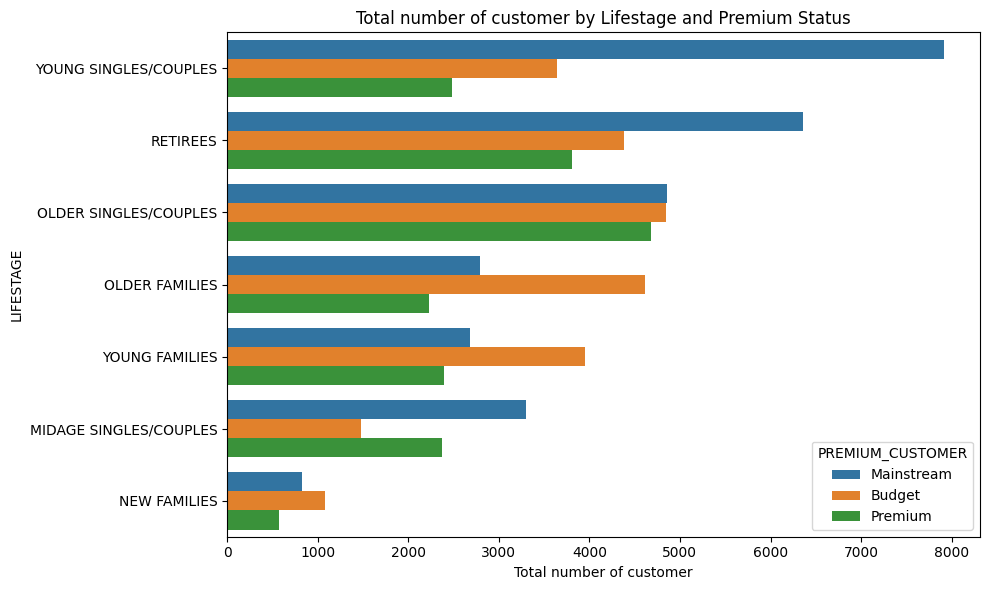

In [93]:
plt.figure(figsize=(10, 6))
sns.barplot(y='LIFESTAGE', x='NUM_CUSTOMERS', hue='PREMIUM_CUSTOMER', data=customer_count)
plt.title('Total number of customer by Lifestage and Premium Status')
plt.xlabel('Total number of customer')
plt.tight_layout()
plt.show()

There are more
- Mainstream - young singles/couples
- Mainstream - retirees

who buy chips.


This contributes to there being more sales to these customer segments but this is not a major driver for the
- Budget - Older families

segment.

Higher sales may also be driven by more units of chips being bought per customer.

Let's have a look at this next.

In [94]:
sales_analysis = pd.merge(total_sales, customer_count, on=['LIFESTAGE', 'PREMIUM_CUSTOMER'])
display(sales_analysis)

,LIFESTAGE,PREMIUM_CUSTOMER,TOT_SALES,NUM_CUSTOMERS
0,OLDER FAMILIES,Budget,156863.75,4611
1,YOUNG SINGLES/COUPLES,Mainstream,147582.20,7917
2,RETIREES,Mainstream,145168.95,6358
3,YOUNG FAMILIES,Budget,129717.95,3953
4,OLDER SINGLES/COUPLES,Budget,127833.60,4849
5,OLDER SINGLES/COUPLES,Mainstream,124648.50,4858
6,OLDER SINGLES/COUPLES,Premium,123537.55,4682
7,RETIREES,Budget,105916.30,4385
8,OLDER FAMILIES,Mainstream,96413.55,2788
9,RETIREES,Premium,91296.65,3812


In [95]:
sales_analysis['AVG_SALES_PER_CUSTOMER'] = sales_analysis['TOT_SALES'] / sales_analysis['NUM_CUSTOMERS']
display(sales_analysis.sort_values(by='AVG_SALES_PER_CUSTOMER', ascending=False))

,LIFESTAGE,PREMIUM_CUSTOMER,TOT_SALES,NUM_CUSTOMERS,AVG_SALES_PER_CUSTOMER
8,OLDER FAMILIES,Mainstream,96413.55,2788,34.581618
0,OLDER FAMILIES,Budget,156863.75,4611,34.019464
13,OLDER FAMILIES,Premium,75242.60,2231,33.725952
3,YOUNG FAMILIES,Budget,129717.95,3953,32.815065
12,YOUNG FAMILIES,Premium,78571.70,2398,32.765513
10,YOUNG FAMILIES,Mainstream,86338.25,2685,32.155773
6,OLDER SINGLES/COUPLES,Premium,123537.55,4682,26.385636
4,OLDER SINGLES/COUPLES,Budget,127833.60,4849,26.362879
11,MIDAGE SINGLES/COUPLES,Mainstream,84734.25,3298,25.692617
5,OLDER SINGLES/COUPLES,Mainstream,124648.50,4858,25.658399


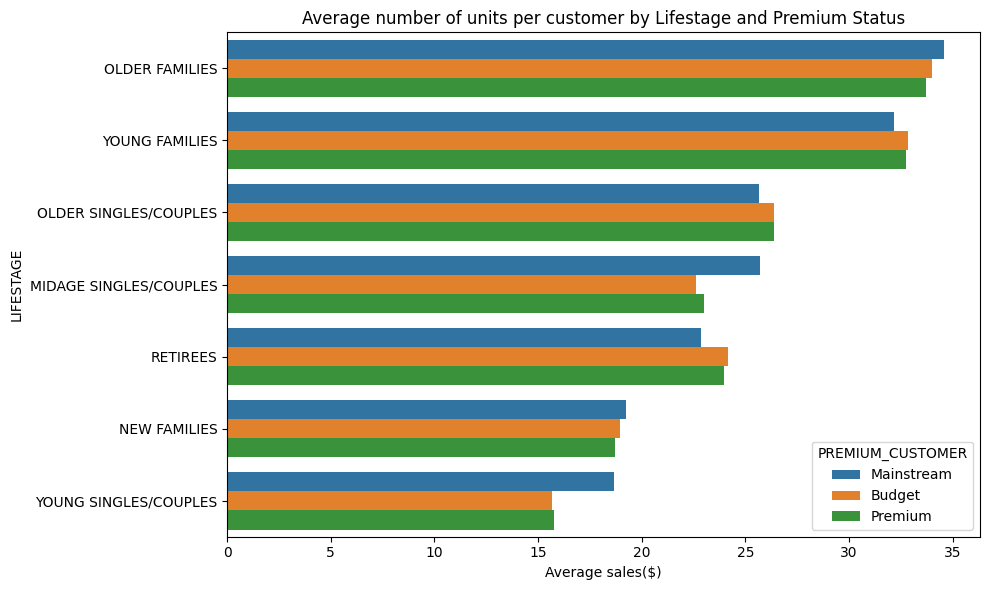

In [96]:
plt.figure(figsize=(10, 6))
sns.barplot(y='LIFESTAGE', x='AVG_SALES_PER_CUSTOMER', hue='PREMIUM_CUSTOMER', data=sales_analysis.sort_values(by='AVG_SALES_PER_CUSTOMER', ascending=False))
plt.title('Average number of units per customer by Lifestage and Premium Status')
plt.xlabel('Average sales($)')
plt.tight_layout()
plt.show()

Older families and young families in general buy more chips per customer

Let's also investigate the average price per unit chips bought for each customer segment as this is also a driver of total sales.

In [97]:
sales_per_unit = data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])[['PROD_QTY','TOT_SALES']].sum().reset_index().sort_values(by=['TOT_SALES','PROD_QTY'], ascending=False)
sales_per_unit['PRICE_PER_UNIT'] = sales_per_unit['TOT_SALES'] / sales_per_unit['PROD_QTY']

print(f"\nThe average price per unit sold by each category of LIFESTAGE and PREMIUM_CUSTOMER : ")
display(sales_per_unit.sort_values(by='PRICE_PER_UNIT', ascending=False))


The average price per unit sold by each category of LIFESTAGE and PREMIUM_CUSTOMER : 


,LIFESTAGE,PREMIUM_CUSTOMER,PROD_QTY,TOT_SALES,PRICE_PER_UNIT
19,YOUNG SINGLES/COUPLES,Mainstream,36225,147582.20,4.074043
1,MIDAGE SINGLES/COUPLES,Mainstream,21213,84734.25,3.994449
4,NEW FAMILIES,Mainstream,4060,15979.70,3.935887
12,RETIREES,Budget,26932,105916.30,3.932731
3,NEW FAMILIES,Budget,5241,20607.45,3.931969
14,RETIREES,Premium,23266,91296.65,3.924037
11,OLDER SINGLES/COUPLES,Premium,31695,123537.55,3.897698
9,OLDER SINGLES/COUPLES,Budget,32883,127833.60,3.887529
5,NEW FAMILIES,Premium,2769,10760.80,3.886168
13,RETIREES,Mainstream,37677,145168.95,3.852986


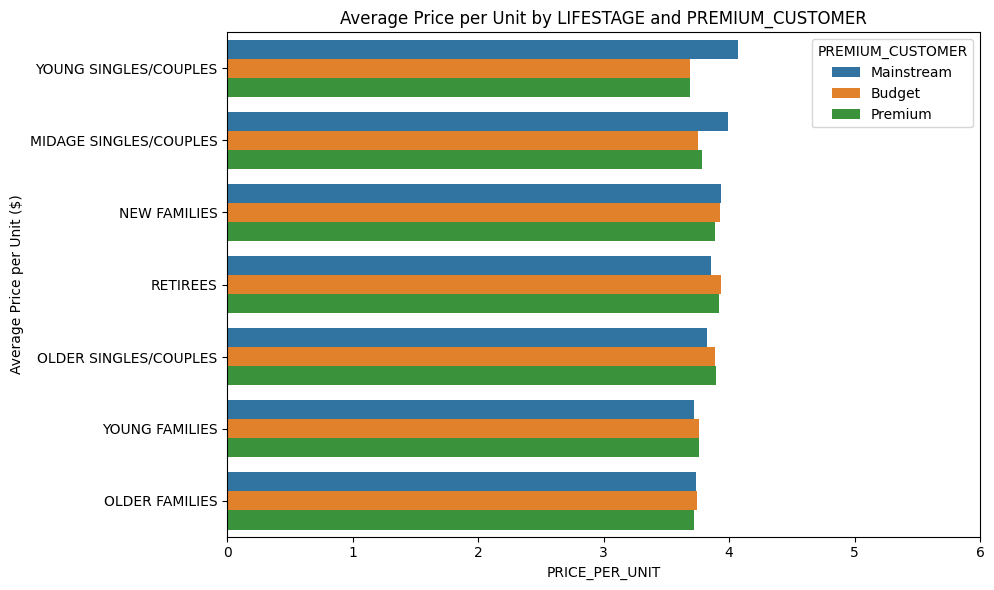

In [98]:
plt.figure(figsize=(10, 6))
sns.barplot(y='LIFESTAGE', x='PRICE_PER_UNIT', hue='PREMIUM_CUSTOMER', data=sales_per_unit.sort_values(by='PRICE_PER_UNIT', ascending=False))
plt.ylabel("Average Price per Unit ($)")
plt.title("Average Price per Unit by LIFESTAGE and PREMIUM_CUSTOMER")
plt.tight_layout()
plt.xlim(0,6)
plt.show()

- Mainstream - midage and young - singles and couples

are more willing to pay more per packet of chips compared to their budget and premium counterparts.

This may be due to premium shoppers being more likely to buy healthy snacks and when they buy chips, this is mainly for entertainment purposes rather than their own consumption.

This is also supported by there being fewer premium midage and young singles and couples buying chips compared to their mainstream counterparts.

As the difference in average price per unit isn't large, we can check if this difference is statistically different.

Let's perform a t-test to see if the difference is significant.

In [99]:
from scipy.stats import ttest_ind

mainstream_group = sales_per_unit[
    (sales_per_unit['PREMIUM_CUSTOMER'] == 'Mainstream') &
    (sales_per_unit['LIFESTAGE'].isin(['YOUNG SINGLES/COUPLES', 'MIDAGE SINGLES/COUPLES']))
]['PRICE_PER_UNIT']

other_group = sales_per_unit[
    (sales_per_unit['PREMIUM_CUSTOMER'].isin(['Budget', 'Premium'])) &
    (sales_per_unit['LIFESTAGE'].isin(['YOUNG SINGLES/COUPLES', 'MIDAGE SINGLES/COUPLES']))
]['PRICE_PER_UNIT']

# Perform independent t-test (two-sample)
t_stat, p_value = ttest_ind(mainstream_group, other_group, equal_var=False)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("Significant difference: Mainstream pays more per unit.")
else:
    print("No significant difference between groups.")

T-statistic: 6.63579690187455
P-value: 0.03112800400930124
Significant difference: Mainstream pays more per unit.


- The t-test results in a `p-value` of `0.0311280`

i.e. the unit price for mainstream, young and mid-age singles and couples are significantly higher than that of budget or premium, young and midage singles and couples.




We have found quite a few interesting insights that we can dive deeper into.

We might want to target customer segments that contribute the most to sales to retain them or further increase sales.

Let's look at *Mainstream - young singles/couples*. For instance, let's find out if they tend to buy a particular brand of chips.

This is about finding brand preference strength. For each brand to compare:

`Affinity Ratio`  =  `Share of brand within segment`  /  `Share of brand overall`


If `ratio > 1` --> segment over-indexes (buys that brand more than average).

If `ratio < 1` --> segment under-indexes.

In [100]:
target_segment = data[
    (data['PREMIUM_CUSTOMER'] == 'Mainstream') &
    (data['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES')
]

segment_brand_counts = target_segment.groupby('BRANDS')['PROD_QTY'].sum()

overall_brand_counts = data.groupby('BRANDS')['PROD_QTY'].sum()

affinity = pd.DataFrame({
    "segment_share": segment_brand_counts / segment_brand_counts.sum(),
    "overall_share": overall_brand_counts / overall_brand_counts.sum()
})

affinity["affinity_ratio"] = affinity["segment_share"] / affinity["overall_share"]    # Calculate affinity ratio

affinity = affinity.sort_values("affinity_ratio", ascending=False)                    # Sort to see top brands

display(affinity)

,segment_share,overall_share,affinity_ratio
BRANDS,,,
Dorito,0.015707,0.012987,1.209484
Tyrrells,0.031553,0.026144,1.206896
Twisties,0.046184,0.038516,1.199068
Doritos,0.107053,0.089758,1.192688
Kettle,0.197985,0.168051,1.178124
Tostitos,0.045411,0.038550,1.177959
Infzns,0.014934,0.012755,1.170857
Pringles,0.119420,0.102081,1.169853
Grain,0.029124,0.025429,1.145267


- Mainstream Young Singles/Couples over-index on international and trendy brands like `Pringles`, `Doritos`, `Tostitos`, and `Tyrrells`.

- They also show a slight preference for premium artisanal chips (`Kettle`, `Infuzions`).

- Conversely, they under-index on mainstream traditional brands (`Smiths`, `CC’s`, `Red Rock Deli`) and budget/private label brands (`Woolworths`).

- Their taste profile leans towards novelty and premium-experience snacks, less towards cheap or “family staple” brands.

Let's also find out if our target segment tends to buy larger packs of chips.



1.   Preferred (Affinity > 1)
2.   Neutral (~1)
3.   Under-indexed (Affinity < 1)



In [101]:
target_segment = data[
    (data['PREMIUM_CUSTOMER'] == 'Mainstream') &
    (data['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES')
]

segment_pack_counts = target_segment.groupby('PACK_SIZE')['PROD_QTY'].sum()

overall_pack_counts = data.groupby('PACK_SIZE')['PROD_QTY'].sum()

pack_affinity = pd.DataFrame({
    "segment_share": segment_pack_counts / segment_pack_counts.sum(),
    "overall_share": overall_pack_counts / overall_pack_counts.sum()
})
pack_affinity["affinity_ratio"] = pack_affinity["segment_share"] / pack_affinity["overall_share"]

pack_affinity = pack_affinity.sort_values(by = 'affinity_ratio', ascending=False)
display(pack_affinity)

,segment_share,overall_share,affinity_ratio
PACK_SIZE,,,
270,0.031829,0.025614,1.242614
380,0.032160,0.026091,1.232631
330,0.061284,0.051018,1.201207
134,0.119420,0.102081,1.169853
110,0.106280,0.091061,1.167132
210,0.029124,0.025429,1.145267
135,0.014769,0.013206,1.118357
250,0.014355,0.012902,1.112613
170,0.080773,0.080970,0.997572


- Mainstream Young Singles/Couples show a clear tendency to purchase larger pack sizes (`270`g, `330`g, `380`g) more often than the population average, suggesting that their chip consumption is oriented towards sharing and social occasions.


- They under-index heavily on small packs (`70`–`125`g), indicating that impulse or single-serve purchases are less common in this group.


- Interestingly, while the general population prefers the typical `150`–`175`g packs, this segment buys them slightly less often, choosing instead bigger sharing packs or unique mid-sized packs (`110`–`135`g).